In [2]:
import warnings
warnings.simplefilter('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

matplotlib.rc('figure', **{'figsize': (20, 14)})
matplotlib.rc('legend', **{'fontsize': 30})
matplotlib.rc('axes', **{'titlesize': 30, 'labelsize': 20})

import numpy as np
import pandas as pd

from mpl_toolkits.basemap import Basemap
import networkx as nx
import urllib
import json

from sklearn.model_selection import train_test_split

# Users

In [3]:
def get_locale(x):
    if x.find('_') != -1:
        return x.split('_')[1]
    else:
        return np.nan

def get_birth_year(x):
    if x.isdigit():
        return x
    else:
        return np.nan
    
def get_joined_at(x):
    if type(x) is str and x.find('T') != -1:
        return x.split('T')[0]
    else:
        return np.nan
    
users = pd.read_csv('data/users.csv')
users.set_index('user_id', inplace=True)

users.locale = users.locale.apply(get_locale)
users.birthyear = users.birthyear.apply(get_birth_year)
users.joinedAt = users.joinedAt.apply(get_joined_at)

users.head()

,locale,birthyear,gender,joinedAt,location,timezone
user_id,,,,,,
3197468391,ID,1993,male,2012-10-02,Medan Indonesia,480.0
3537982273,ID,1992,male,2012-09-29,Medan Indonesia,420.0
823183725,US,1975,male,2012-10-06,Stratford Ontario,-240.0
1872223848,US,1991,female,2012-11-04,Tehran Iran,210.0
3429017717,ID,1995,female,2012-09-10,NaN,420.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38209 entries, 3197468391 to 125781176
Data columns (total 6 columns):
locale       38209 non-null object
birthyear    36715 non-null object
gender       38100 non-null object
joinedAt     38151 non-null object
location     32745 non-null object
timezone     37773 non-null float64
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


([<matplotlib.patches.Wedge at 0x7fbcb3d52b50>,
  <matplotlib.text.Text at 0x7fbcb3d65bd0>])

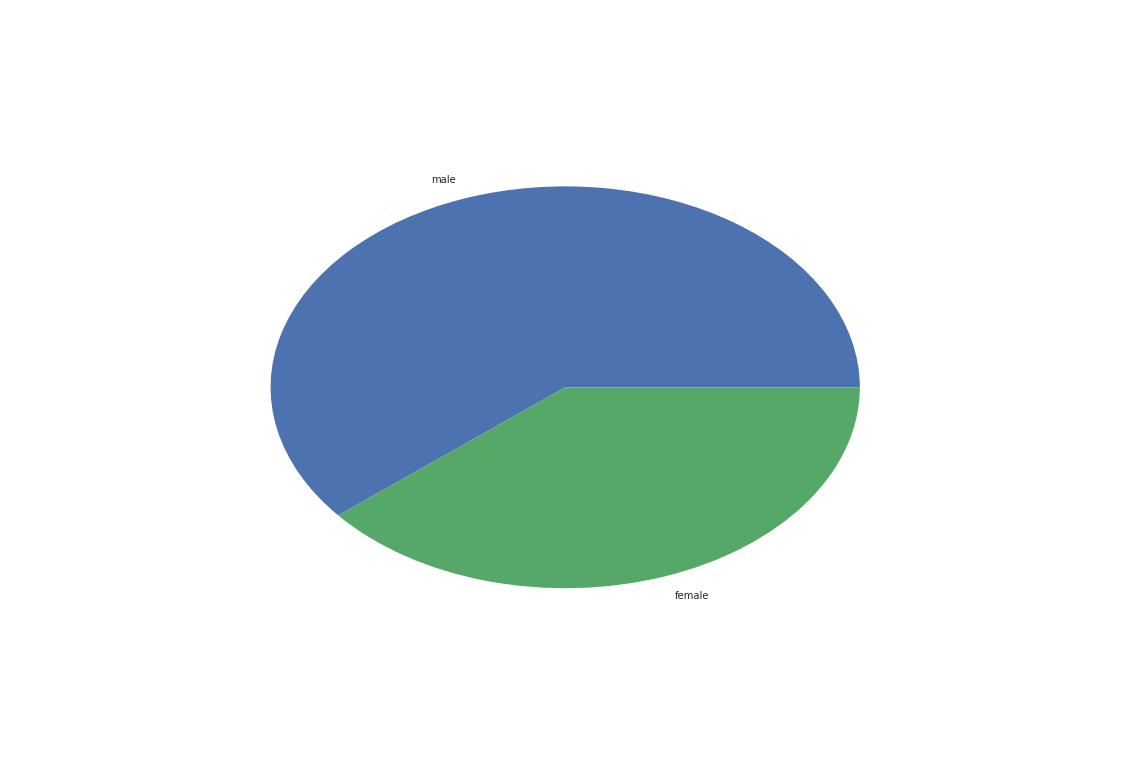

In [5]:
plt.pie(users.gender.value_counts(), labels=['male', 'female'], radius=0.66)

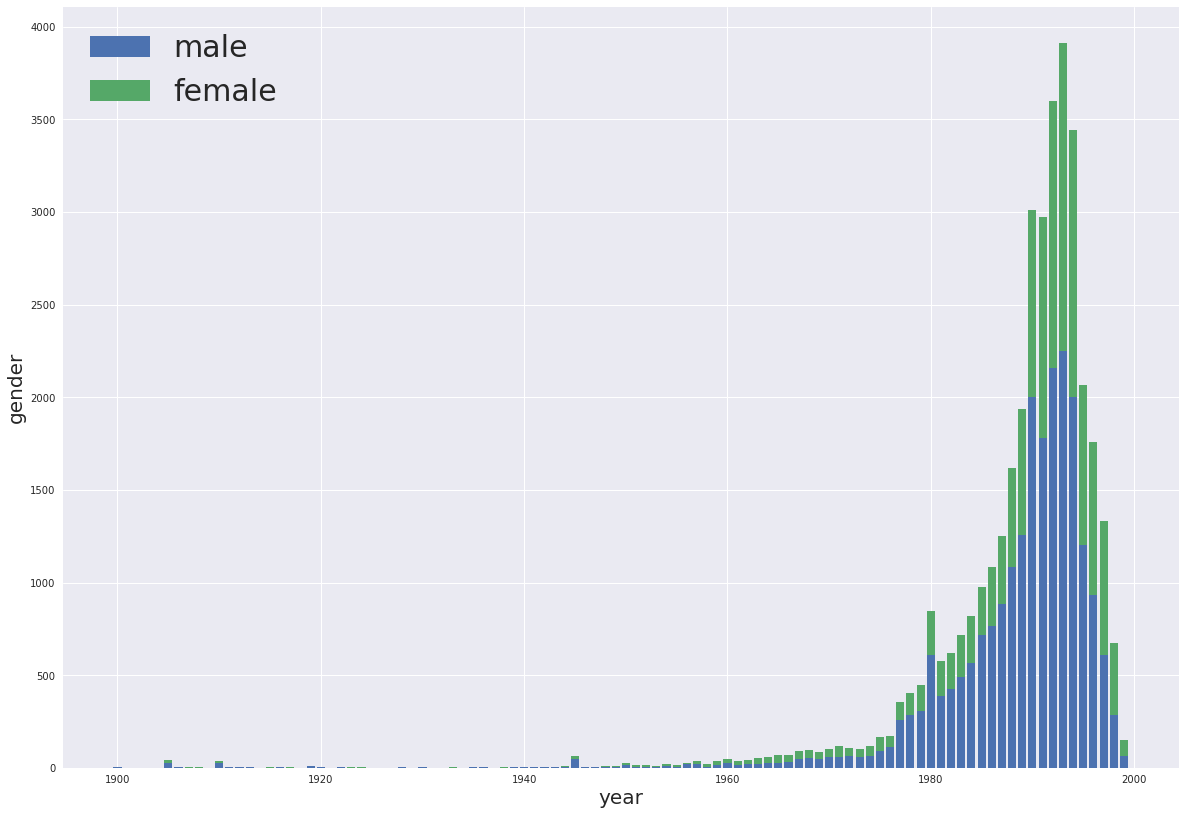

In [6]:
values = users[['birthyear', 'gender']][[True if x is not np.nan else False for x in users['birthyear']]]
                                        
values.birthyear = values.birthyear.apply(lambda x: np.int32(x))
values = values.groupby('birthyear').agg({'gender': 
                                          {'male': lambda x: np.count_nonzero(x == 'male'),
                                           'female': lambda x: np.count_nonzero(x == 'female'),
                                           'all': len}})

bar1 = plt.bar(values.index, 
               values['gender']['male'])
bar2 = plt.bar(values.index, 
               values['gender']['female'], 
               bottom=values['gender']['male'])

plt.legend((bar1[0], bar2[0]), ('male', 'female'))
plt.xlabel('year')
plt.ylabel('gender')
plt.title('')

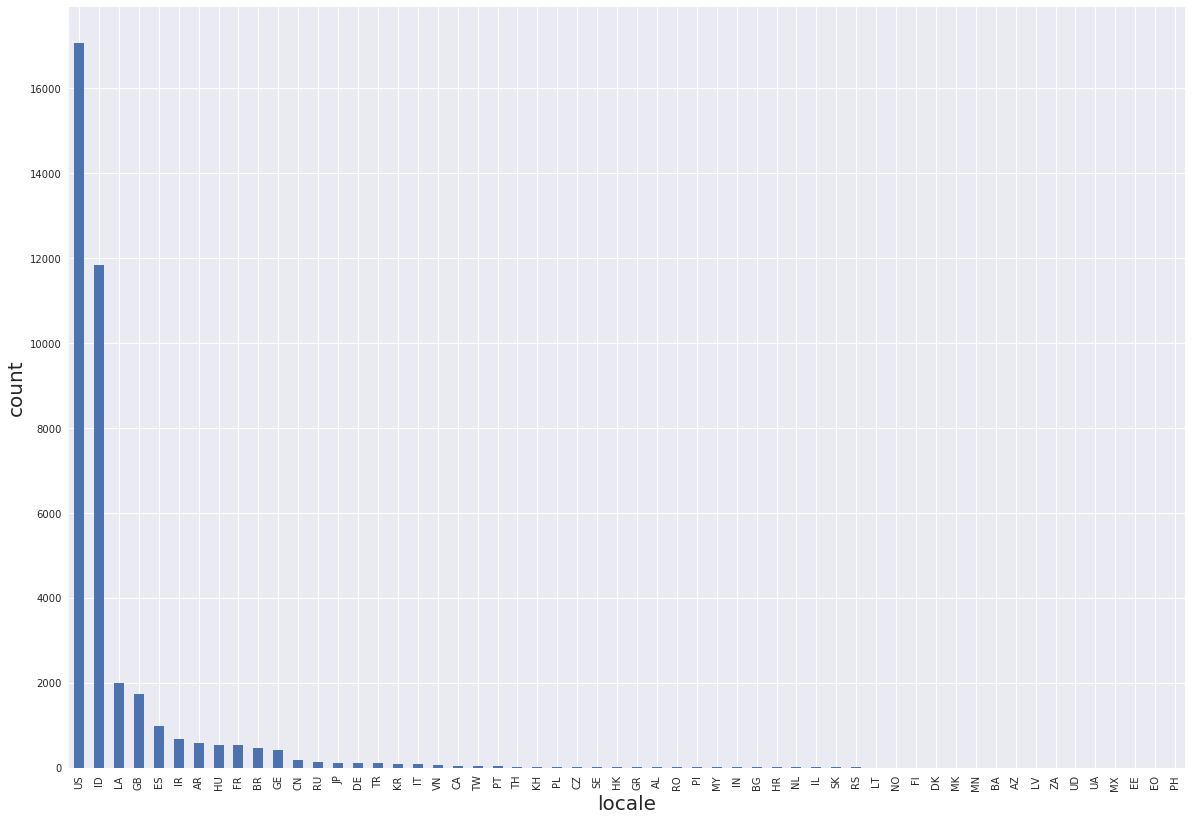

In [7]:
users.locale.value_counts().plot(kind='bar')
plt.xlabel('locale')
plt.ylabel('count')

In [8]:
users.joinedAt.apply(lambda x: x.split('-')[0] if type(x) is str else np.nan).value_counts()

2012    38151
Name: joinedAt, dtype: int64

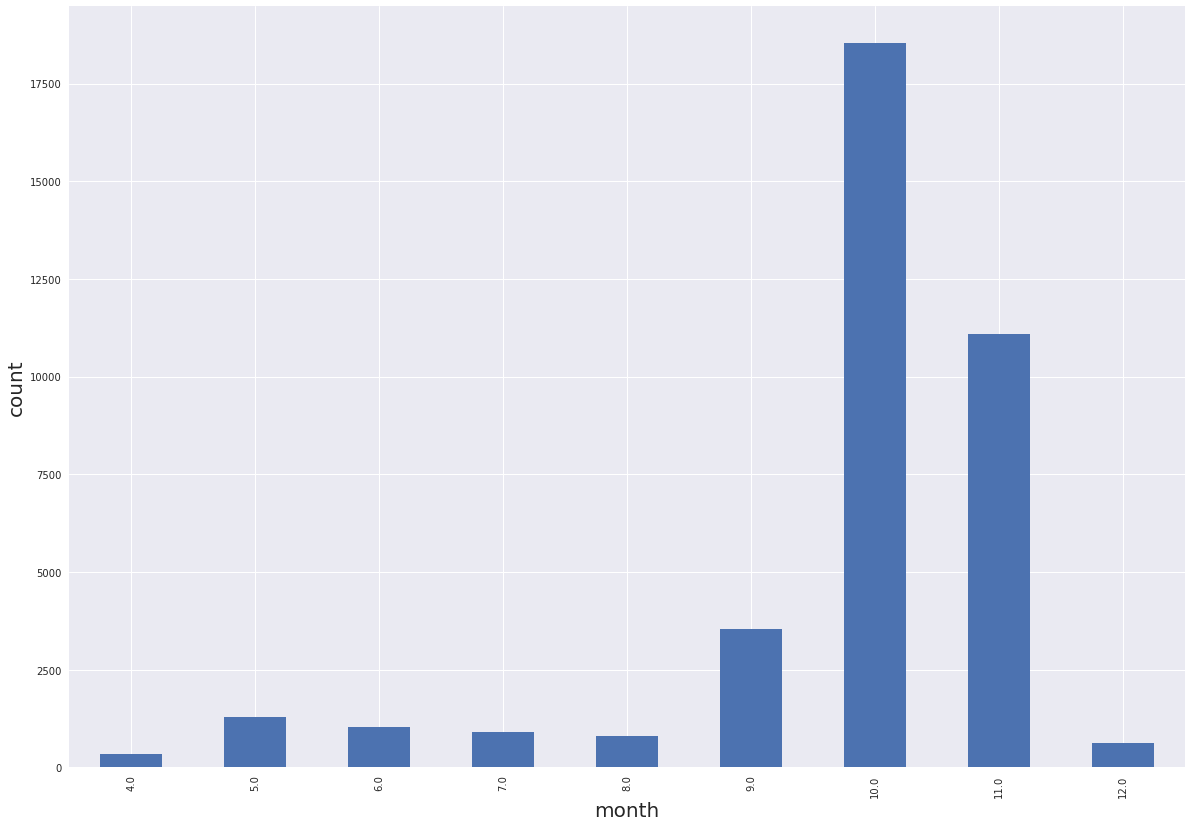

In [9]:
(users.joinedAt.apply(lambda x: int(x.split('-')[1]) if type(x) is str else np.nan)
               .value_counts()
               .sort_index()
               .plot(kind='bar'))
plt.xlabel('month')
plt.ylabel('count')

In [10]:
googleGeocodeUrl = 'http://nominatim.openstreetmap.org/search?'

def geocode(address):
    parms = {
        'q': address,
        'format': 'json'}

    url = googleGeocodeUrl + urllib.urlencode(parms)
    print(url)
    response = urllib.urlopen(url)
    response_list = list(response)
    line = json.loads(''.join(response_list))
    latitude, longitude = line[0]['lat'], line[0]['lon']
    return latitude, longitude


locations = pd.DataFrame({'location': users.location, 'count': 1})
location_counts = locations.groupby('location').count()

lats, lngs = [], []
for location in location_counts.index:
    try:
        lat, lng = geocode(location)
        lats.append(lat)
        lngs.append(lng)
    except:
        print('Error location: %s' % location)
        lats.append(np.nan)
        lngs.append(np.nan)
    
location_counts['lat'] = lats
location_counts['lng'] = lngs

http://nominatim.openstreetmap.org/search?q=++&format=json
Error location:   
http://nominatim.openstreetmap.org/search?q=Abadan++Iran&format=json
http://nominatim.openstreetmap.org/search?q=Abadeh&format=json
http://nominatim.openstreetmap.org/search?q=Abbottabad&format=json
http://nominatim.openstreetmap.org/search?q=Aberdeen&format=json
http://nominatim.openstreetmap.org/search?q=Aberdeen++SD&format=json
http://nominatim.openstreetmap.org/search?q=Abhar&format=json
http://nominatim.openstreetmap.org/search?q=Abia++Ebonyi++Nigeria&format=json
http://nominatim.openstreetmap.org/search?q=Abidjan++82&format=json
http://nominatim.openstreetmap.org/search?q=Abidjan++Cote+d%27Ivoire&format=json
http://nominatim.openstreetmap.org/search?q=Ablagh++05&format=json
Error location: Ablagh  05
http://nominatim.openstreetmap.org/search?q=Absecon++NJ&format=json
http://nominatim.openstreetmap.org/search?q=Abu+Dhabi++01&format=json
http://nominatim.openstreetmap.org/search?q=Abu+Dhabi++United+Arab+E

http://nominatim.openstreetmap.org/search?q=Apache+Junction++AZ&format=json
http://nominatim.openstreetmap.org/search?q=Apache+Junction++Arizona&format=json
http://nominatim.openstreetmap.org/search?q=Apo++AE&format=json
http://nominatim.openstreetmap.org/search?q=Apopka++FL&format=json
http://nominatim.openstreetmap.org/search?q=Apopka++Florida&format=json
http://nominatim.openstreetmap.org/search?q=Apucarana&format=json
http://nominatim.openstreetmap.org/search?q=Ar+Rakah++06&format=json
http://nominatim.openstreetmap.org/search?q=Arak++Iran&format=json
http://nominatim.openstreetmap.org/search?q=Arawa++Papua+New+Guinea&format=json
http://nominatim.openstreetmap.org/search?q=Arbela++Arbil++Iraq&format=json
Error location: Arbela  Arbil  Iraq
http://nominatim.openstreetmap.org/search?q=Arbil++11&format=json
http://nominatim.openstreetmap.org/search?q=Arcadia++CA&format=json
http://nominatim.openstreetmap.org/search?q=Arcadia++California&format=json
http://nominatim.openstreetmap.org/s

http://nominatim.openstreetmap.org/search?q=Banlung&format=json
http://nominatim.openstreetmap.org/search?q=Bantoel++Yogyakarta++Indonesia&format=json
Error location: Bantoel  Yogyakarta  Indonesia
http://nominatim.openstreetmap.org/search?q=Bantul&format=json
http://nominatim.openstreetmap.org/search?q=Bantul++10&format=json
http://nominatim.openstreetmap.org/search?q=Banyumas++Jawa+Barat++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Banyumas++Jawa+Tengah++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Banyuwangi++08&format=json
http://nominatim.openstreetmap.org/search?q=Banyuwangi++Jawa+Timur++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Barahona++Dominican+Republic&format=json
http://nominatim.openstreetmap.org/search?q=Barahona++United+States&format=json
http://nominatim.openstreetmap.org/search?q=Barboursville++WV&format=json
http://nominatim.openstreetmap.org/search?q=Barcelona++02&format=json
http://nominatim.openstre

http://nominatim.openstreetmap.org/search?q=Bima&format=json
http://nominatim.openstreetmap.org/search?q=Binh+Phuoc++Vietnam&format=json
http://nominatim.openstreetmap.org/search?q=Binjai&format=json
http://nominatim.openstreetmap.org/search?q=Binjai++26&format=json
http://nominatim.openstreetmap.org/search?q=Binjai++Sumatera+Selatan++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Binji&format=json
http://nominatim.openstreetmap.org/search?q=Bintaro++Jawa+Barat++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Bireuen++Aceh++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Birjand&format=json
http://nominatim.openstreetmap.org/search?q=Birmingham++A7&format=json
http://nominatim.openstreetmap.org/search?q=Birmingham++United+Kingdom&format=json
http://nominatim.openstreetmap.org/search?q=Bishkek++Kyrgyzstan&format=json
http://nominatim.openstreetmap.org/search?q=Biskirchen++Hessen++Germany&format=json
http://nominatim.openstreetmap.or

http://nominatim.openstreetmap.org/search?q=Butler++Missouri&format=json
http://nominatim.openstreetmap.org/search?q=Cabanas++Galicia&format=json
http://nominatim.openstreetmap.org/search?q=Cabareta++Puerto+Plata++Dominican+Republic&format=json
Error location: Cabareta  Puerto Plata  Dominican Republic
http://nominatim.openstreetmap.org/search?q=Cabuyao++Laguna&format=json
http://nominatim.openstreetmap.org/search?q=Cachoeirinha&format=json
http://nominatim.openstreetmap.org/search?q=Caen++France&format=json
http://nominatim.openstreetmap.org/search?q=Cagayan+De+Oro++B2&format=json
http://nominatim.openstreetmap.org/search?q=Cagayan+de+Oro++Philippines&format=json
http://nominatim.openstreetmap.org/search?q=Cainta++Rizal&format=json
http://nominatim.openstreetmap.org/search?q=Cairo++11&format=json
http://nominatim.openstreetmap.org/search?q=Cairo++Egypt&format=json
http://nominatim.openstreetmap.org/search?q=Cairo++GA&format=json
http://nominatim.openstreetmap.org/search?q=Cakung++Indo

http://nominatim.openstreetmap.org/search?q=Chicago++Illinois&format=json
http://nominatim.openstreetmap.org/search?q=Chiclayo++Peru&format=json
http://nominatim.openstreetmap.org/search?q=Chico++California&format=json
http://nominatim.openstreetmap.org/search?q=Chiguayante++Bio-Bio++Chile&format=json
http://nominatim.openstreetmap.org/search?q=Childress++Texas&format=json
http://nominatim.openstreetmap.org/search?q=Chino++CA&format=json
http://nominatim.openstreetmap.org/search?q=Chino++California&format=json
http://nominatim.openstreetmap.org/search?q=Chino+Hills++CA&format=json
http://nominatim.openstreetmap.org/search?q=Chino+Hills++California&format=json
http://nominatim.openstreetmap.org/search?q=Chisinau++57&format=json
http://nominatim.openstreetmap.org/search?q=Chitradurga++19&format=json
http://nominatim.openstreetmap.org/search?q=Chittagong++85&format=json
http://nominatim.openstreetmap.org/search?q=Chiyoda-ku++Tokyo++Japan&format=json
http://nominatim.openstreetmap.org/sear

http://nominatim.openstreetmap.org/search?q=Dagupan+City++Dagupan++Philippines&format=json
http://nominatim.openstreetmap.org/search?q=Dallas++TX&format=json
http://nominatim.openstreetmap.org/search?q=Dallas++Texas&format=json
http://nominatim.openstreetmap.org/search?q=Dalton++GA&format=json
http://nominatim.openstreetmap.org/search?q=Daly+City++CA&format=json
http://nominatim.openstreetmap.org/search?q=Daly+City++California&format=json
http://nominatim.openstreetmap.org/search?q=Damak++Hungary&format=json
http://nominatim.openstreetmap.org/search?q=Damansara++Kuala+Lumpur++Malaysia&format=json
http://nominatim.openstreetmap.org/search?q=Damas++Dimashq++Syria&format=json
http://nominatim.openstreetmap.org/search?q=Damascus++13&format=json
http://nominatim.openstreetmap.org/search?q=Damascus++Syria&format=json
http://nominatim.openstreetmap.org/search?q=Dammam++06&format=json
http://nominatim.openstreetmap.org/search?q=Dammam++Saudi+Arabia&format=json
http://nominatim.openstreetmap.or

http://nominatim.openstreetmap.org/search?q=Ecroignard++Flacq++Mauritius&format=json
http://nominatim.openstreetmap.org/search?q=Edinburg++Texas&format=json
http://nominatim.openstreetmap.org/search?q=Edinburgh++United+Kingdom&format=json
http://nominatim.openstreetmap.org/search?q=Edmonton++AB&format=json
http://nominatim.openstreetmap.org/search?q=Edmonton++Alberta&format=json
http://nominatim.openstreetmap.org/search?q=Eger++Hungary&format=json
http://nominatim.openstreetmap.org/search?q=Eindhoven++Noord-Brabant&format=json
http://nominatim.openstreetmap.org/search?q=El+Achour&format=json
http://nominatim.openstreetmap.org/search?q=El+Achour++01&format=json
http://nominatim.openstreetmap.org/search?q=El+Affroun&format=json
http://nominatim.openstreetmap.org/search?q=El+Ingenio+Arriba++Santiago++Dominican+Republic&format=json
Error location: El Ingenio Arriba  Santiago  Dominican Republic
http://nominatim.openstreetmap.org/search?q=El+Monte++CA&format=json
http://nominatim.openstreet

http://nominatim.openstreetmap.org/search?q=Fremont++CA&format=json
http://nominatim.openstreetmap.org/search?q=Fremont++California&format=json
http://nominatim.openstreetmap.org/search?q=Fresno++CA&format=json
http://nominatim.openstreetmap.org/search?q=Fresno++California&format=json
http://nominatim.openstreetmap.org/search?q=Friend++New+York&format=json
http://nominatim.openstreetmap.org/search?q=Frisco++Texas&format=json
http://nominatim.openstreetmap.org/search?q=Fukuoka-shi++Fukuoka++Japan&format=json
http://nominatim.openstreetmap.org/search?q=Full++01&format=json
http://nominatim.openstreetmap.org/search?q=Fullerton++CA&format=json
http://nominatim.openstreetmap.org/search?q=Fullerton++California&format=json
http://nominatim.openstreetmap.org/search?q=Fuwwah++Hadramawt++Yemen&format=json
http://nominatim.openstreetmap.org/search?q=Gaborone++09&format=json
http://nominatim.openstreetmap.org/search?q=Gainesville++FL&format=json
http://nominatim.openstreetmap.org/search?q=Galati&f

http://nominatim.openstreetmap.org/search?q=Hacienda+Heights++CA&format=json
http://nominatim.openstreetmap.org/search?q=Hacienda+Heights++California&format=json
http://nominatim.openstreetmap.org/search?q=Haidari++Greece&format=json
http://nominatim.openstreetmap.org/search?q=Haina&format=json
http://nominatim.openstreetmap.org/search?q=Haina++Dominican+Republic&format=json
http://nominatim.openstreetmap.org/search?q=Haina+Arriba++Distrito+Nacional++Dominican+Republic&format=json
Error location: Haina Arriba  Distrito Nacional  Dominican Republic
http://nominatim.openstreetmap.org/search?q=Halifax++NS&format=json
http://nominatim.openstreetmap.org/search?q=Halifax++Nova+Scotia&format=json
http://nominatim.openstreetmap.org/search?q=Halmaj&format=json
http://nominatim.openstreetmap.org/search?q=Hama++Syria&format=json
http://nominatim.openstreetmap.org/search?q=Hamburg++04&format=json
http://nominatim.openstreetmap.org/search?q=Hamburg++Germany&format=json
http://nominatim.openstreetma

http://nominatim.openstreetmap.org/search?q=Inazawa-shi++Aichi++Japan&format=json
http://nominatim.openstreetmap.org/search?q=Incheon++Korea&format=json
http://nominatim.openstreetmap.org/search?q=Indore++35&format=json
http://nominatim.openstreetmap.org/search?q=Indramayu&format=json
http://nominatim.openstreetmap.org/search?q=Indrapura++Sumatera+Utara++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Inglewood++CA&format=json
http://nominatim.openstreetmap.org/search?q=Inglewood++California&format=json
http://nominatim.openstreetmap.org/search?q=Innsbruck++Austria&format=json
http://nominatim.openstreetmap.org/search?q=Ipoh++07&format=json
http://nominatim.openstreetmap.org/search?q=Ipoh++Perak&format=json
http://nominatim.openstreetmap.org/search?q=Iriga+City&format=json
http://nominatim.openstreetmap.org/search?q=Irvine++CA&format=json
http://nominatim.openstreetmap.org/search?q=Irvine++California&format=json
http://nominatim.openstreetmap.org/search?q=Irving++TX&f

http://nominatim.openstreetmap.org/search?q=Kassel++05&format=json
http://nominatim.openstreetmap.org/search?q=Kassel++Germany&format=json
http://nominatim.openstreetmap.org/search?q=Kathmandu++Nepal&format=json
http://nominatim.openstreetmap.org/search?q=Katonah++New+York&format=json
http://nominatim.openstreetmap.org/search?q=Kawasaki++19&format=json
http://nominatim.openstreetmap.org/search?q=Kayseri++38&format=json
http://nominatim.openstreetmap.org/search?q=Kayseri++turkey&format=json
http://nominatim.openstreetmap.org/search?q=Kazan++73&format=json
http://nominatim.openstreetmap.org/search?q=Kazincbarcika&format=json
http://nominatim.openstreetmap.org/search?q=Kebumen++Jawa+Tengah++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Kediri++08&format=json
http://nominatim.openstreetmap.org/search?q=Keelung++Taiwan&format=json
http://nominatim.openstreetmap.org/search?q=Kembangan++Jakarta+Raya++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Kendal+

http://nominatim.openstreetmap.org/search?q=La+Flora++Savanne++Mauritius&format=json
http://nominatim.openstreetmap.org/search?q=La+Guada++Samana++Dominican+Republic&format=json
Error location: La Guada  Samana  Dominican Republic
http://nominatim.openstreetmap.org/search?q=La+Habra++CA&format=json
http://nominatim.openstreetmap.org/search?q=La+Habra++California&format=json
http://nominatim.openstreetmap.org/search?q=La+Habra+Heights++California&format=json
http://nominatim.openstreetmap.org/search?q=La+Laura++Moka++Mauritius&format=json
http://nominatim.openstreetmap.org/search?q=La+Manouba++Tunis++Tunisia&format=json
http://nominatim.openstreetmap.org/search?q=La+Mirada++CA&format=json
http://nominatim.openstreetmap.org/search?q=La+Mirada++California&format=json
http://nominatim.openstreetmap.org/search?q=La+Palma++California&format=json
http://nominatim.openstreetmap.org/search?q=La+Paz++Baja+California+Sur&format=json
http://nominatim.openstreetmap.org/search?q=La+Piedad+Cabadas++M

http://nominatim.openstreetmap.org/search?q=Liverpool++H8&format=json
http://nominatim.openstreetmap.org/search?q=Loma+Linda++CA&format=json
http://nominatim.openstreetmap.org/search?q=Loma+Linda++California&format=json
http://nominatim.openstreetmap.org/search?q=Lombok++Nusa+Tenggara+Barat++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Lomita++CA&format=json
http://nominatim.openstreetmap.org/search?q=Lomita++California&format=json
http://nominatim.openstreetmap.org/search?q=London++California&format=json
http://nominatim.openstreetmap.org/search?q=London++H9&format=json
http://nominatim.openstreetmap.org/search?q=London++ON&format=json
http://nominatim.openstreetmap.org/search?q=London++Ohio&format=json
http://nominatim.openstreetmap.org/search?q=London++Ontario&format=json
http://nominatim.openstreetmap.org/search?q=London++United+Kingdom&format=json
http://nominatim.openstreetmap.org/search?q=Londres++Catamarca&format=json
http://nominatim.openstreetmap.org/sear

http://nominatim.openstreetmap.org/search?q=Mansoura++01&format=json
http://nominatim.openstreetmap.org/search?q=Mansourah++Ad+Daqahliyah++Egypt&format=json
Error location: Mansourah  Ad Daqahliyah  Egypt
http://nominatim.openstreetmap.org/search?q=Manteca++CA&format=json
http://nominatim.openstreetmap.org/search?q=Mao&format=json
http://nominatim.openstreetmap.org/search?q=Mao++Valverde&format=json
http://nominatim.openstreetmap.org/search?q=Mao+Adentro++Valverde++Dominican+Republic&format=json
Error location: Mao Adentro  Valverde  Dominican Republic
http://nominatim.openstreetmap.org/search?q=Maple++ON&format=json
http://nominatim.openstreetmap.org/search?q=Maple++Ontario&format=json
http://nominatim.openstreetmap.org/search?q=Mapleton++Utah&format=json
http://nominatim.openstreetmap.org/search?q=Maracaibo++Venezuela&format=json
http://nominatim.openstreetmap.org/search?q=Maracas++Saint+George++Trinidad+And+Tobago&format=json
Error location: Maracas  Saint George  Trinidad And Tobag

http://nominatim.openstreetmap.org/search?q=Mississauga++ON&format=json
http://nominatim.openstreetmap.org/search?q=Mississauga++Ontario&format=json
http://nominatim.openstreetmap.org/search?q=Misurata++58&format=json
http://nominatim.openstreetmap.org/search?q=Mitaka++Tokyo++Japan&format=json
http://nominatim.openstreetmap.org/search?q=Mlati++10&format=json
http://nominatim.openstreetmap.org/search?q=Mlati++Yogyakarta++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Moca++08&format=json
http://nominatim.openstreetmap.org/search?q=Moca++Espaillat&format=json
http://nominatim.openstreetmap.org/search?q=Modoinding++Sulawesi+Utara++Indonesia&format=json
Error location: Modoinding  Sulawesi Utara  Indonesia
http://nominatim.openstreetmap.org/search?q=Mohamedia&format=json
http://nominatim.openstreetmap.org/search?q=Mojoagung++Jawa+Timur++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Mojokerto&format=json
http://nominatim.openstreetmap.org/search?q=Mojo

http://nominatim.openstreetmap.org/search?q=New+York++NY&format=json
http://nominatim.openstreetmap.org/search?q=New+York++New+York&format=json
http://nominatim.openstreetmap.org/search?q=Newark++NJ&format=json
http://nominatim.openstreetmap.org/search?q=Newark++New+Jersey&format=json
http://nominatim.openstreetmap.org/search?q=Newburgh++New+York&format=json
http://nominatim.openstreetmap.org/search?q=Newmarket++Ontario&format=json
http://nominatim.openstreetmap.org/search?q=Newport+Beach++California&format=json
http://nominatim.openstreetmap.org/search?q=Newtown++CT&format=json
http://nominatim.openstreetmap.org/search?q=Newtown++Connecticut&format=json
http://nominatim.openstreetmap.org/search?q=Newville++PA&format=json
http://nominatim.openstreetmap.org/search?q=Neyba&format=json
http://nominatim.openstreetmap.org/search?q=Nganjuk&format=json
http://nominatim.openstreetmap.org/search?q=Ngawi++Jawa+Tengah++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Ngawinan++Ja

http://nominatim.openstreetmap.org/search?q=Pacoima++CA&format=json
http://nominatim.openstreetmap.org/search?q=Pacoima++California&format=json
http://nominatim.openstreetmap.org/search?q=Padang++24&format=json
http://nominatim.openstreetmap.org/search?q=Padang++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Padang+Sidempuan&format=json
http://nominatim.openstreetmap.org/search?q=Padangpanjang&format=json
http://nominatim.openstreetmap.org/search?q=Padangsidimpuan++Sumatera+Utara++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=Pagadian+City&format=json
http://nominatim.openstreetmap.org/search?q=Pailin&format=json
http://nominatim.openstreetmap.org/search?q=Pailles++15&format=json
http://nominatim.openstreetmap.org/search?q=Pailles+Village++Moka++Mauritius&format=json
Error location: Pailles Village  Moka  Mauritius
http://nominatim.openstreetmap.org/search?q=Pakualaman++Yogyakarta++Indonesia&format=json
http://nominatim.openstreetmap.org/search?q=

http://nominatim.openstreetmap.org/search?q=Petrolia++Ontario&format=json
http://nominatim.openstreetmap.org/search?q=Petukangan++Jawa+Barat++Indonesia&format=json
Error location: Petukangan  Jawa Barat  Indonesia
http://nominatim.openstreetmap.org/search?q=Philadelphia++PA&format=json
http://nominatim.openstreetmap.org/search?q=Philadelphia++Pennsylvania&format=json
http://nominatim.openstreetmap.org/search?q=Phnom+Pen++Phnum+Penh++Cambodia&format=json
http://nominatim.openstreetmap.org/search?q=Phnom+Penh&format=json
http://nominatim.openstreetmap.org/search?q=Phnom+Penh++11&format=json
http://nominatim.openstreetmap.org/search?q=Phoenix++AZ&format=json
http://nominatim.openstreetmap.org/search?q=Phoenix++Arizona&format=json
http://nominatim.openstreetmap.org/search?q=Phoenix++Mauritius&format=json
http://nominatim.openstreetmap.org/search?q=Phum+Thmar+Kol++Batdambang++Cambodia&format=json
Error location: Phum Thmar Kol  Batdambang  Cambodia
http://nominatim.openstreetmap.org/search?

Error location: Probolinggo
http://nominatim.openstreetmap.org/search?q=Providence++Rhode+Island&format=json
Error location: Providence  Rhode Island
http://nominatim.openstreetmap.org/search?q=Providence++UT&format=json
Error location: Providence  UT
http://nominatim.openstreetmap.org/search?q=Provo++Utah&format=json
Error location: Provo  Utah
http://nominatim.openstreetmap.org/search?q=Puebla++21&format=json
Error location: Puebla  21
http://nominatim.openstreetmap.org/search?q=Puebla++Puebla&format=json
Error location: Puebla  Puebla
http://nominatim.openstreetmap.org/search?q=Puerto+San+Lorenzo++Santa+Fe++Argentina&format=json
Error location: Puerto San Lorenzo  Santa Fe  Argentina
http://nominatim.openstreetmap.org/search?q=Puerto+Vallarta++Jalisco&format=json
Error location: Puerto Vallarta  Jalisco
http://nominatim.openstreetmap.org/search?q=Puncak+Alam&format=json
Error location: Puncak Alam
http://nominatim.openstreetmap.org/search?q=Pundong++Jawa+Tengah++Indonesia&format=jso

Error location: Rennes  A2
http://nominatim.openstreetmap.org/search?q=Renton++Washington&format=json
Error location: Renton  Washington
http://nominatim.openstreetmap.org/search?q=Reseda++CA&format=json
Error location: Reseda  CA
http://nominatim.openstreetmap.org/search?q=Reseda++California&format=json
Error location: Reseda  California
http://nominatim.openstreetmap.org/search?q=Reshteh++Tehran++Iran&format=json
Error location: Reshteh  Tehran  Iran
http://nominatim.openstreetmap.org/search?q=Reus&format=json
Error location: Reus
http://nominatim.openstreetmap.org/search?q=Revere++MA&format=json
Error location: Revere  MA
http://nominatim.openstreetmap.org/search?q=Rexdale++Ontario&format=json
Error location: Rexdale  Ontario
http://nominatim.openstreetmap.org/search?q=Rheine++Germany&format=json
Error location: Rheine  Germany
http://nominatim.openstreetmap.org/search?q=Rialto++CA&format=json
Error location: Rialto  CA
http://nominatim.openstreetmap.org/search?q=Rialto++California&

Error location: Saint Petersburg  Florida
http://nominatim.openstreetmap.org/search?q=Saint+Pierre++Moka++Mauritius&format=json
Error location: Saint Pierre  Moka  Mauritius
http://nominatim.openstreetmap.org/search?q=Saint+Priest++Rhone-Alpes++France&format=json
Error location: Saint Priest  Rhone-Alpes  France
http://nominatim.openstreetmap.org/search?q=Saint-Chrysostome++Quebec&format=json
Error location: Saint-Chrysostome  Quebec
http://nominatim.openstreetmap.org/search?q=Saint-Eustache++Quebec&format=json
Error location: Saint-Eustache  Quebec
http://nominatim.openstreetmap.org/search?q=Saint-Georges++Quebec&format=json
Error location: Saint-Georges  Quebec
http://nominatim.openstreetmap.org/search?q=Saint-Gilles-Les+Bains++Reunion&format=json
Error location: Saint-Gilles-Les Bains  Reunion
http://nominatim.openstreetmap.org/search?q=Saint-Priest++Rhone-Alpes++France&format=json
Error location: Saint-Priest  Rhone-Alpes  France
http://nominatim.openstreetmap.org/search?q=Saint-mi

Error location: San Piero In Campo  Toscana  Italy
http://nominatim.openstreetmap.org/search?q=San+Rafael++CA&format=json
Error location: San Rafael  CA
http://nominatim.openstreetmap.org/search?q=San+Rafael++California&format=json
Error location: San Rafael  California
http://nominatim.openstreetmap.org/search?q=San+Ramon++California&format=json
Error location: San Ramon  California
http://nominatim.openstreetmap.org/search?q=San+Salvador++10&format=json
Error location: San Salvador  10
http://nominatim.openstreetmap.org/search?q=San+Salvador++El+Salvador&format=json
Error location: San Salvador  El Salvador
http://nominatim.openstreetmap.org/search?q=San+Salvador++Hidalgo&format=json
Error location: San Salvador  Hidalgo
http://nominatim.openstreetmap.org/search?q=Sana++04&format=json
Error location: Sana  04
http://nominatim.openstreetmap.org/search?q=Sanaa++16&format=json
Error location: Sanaa  16
http://nominatim.openstreetmap.org/search?q=Sanchez+Mira&format=json
Error location: 

Error location: Serang
http://nominatim.openstreetmap.org/search?q=Seremban++05&format=json
Error location: Seremban  05
http://nominatim.openstreetmap.org/search?q=Seri+Kembangan++12&format=json
Error location: Seri Kembangan  12
http://nominatim.openstreetmap.org/search?q=Serpong++Jawa+Barat++Indonesia&format=json
Error location: Serpong  Jawa Barat  Indonesia
http://nominatim.openstreetmap.org/search?q=Serra++Espirito+Santo&format=json
Error location: Serra  Espirito Santo
http://nominatim.openstreetmap.org/search?q=Serrekunda++Western++Gambia&format=json
Error location: Serrekunda  Western  Gambia
http://nominatim.openstreetmap.org/search?q=Sesvete++Grad+Zagreb++Croatia&format=json
Error location: Sesvete  Grad Zagreb  Croatia
http://nominatim.openstreetmap.org/search?q=Sewon++Yogyakarta++Indonesia&format=json
Error location: Sewon  Yogyakarta  Indonesia
http://nominatim.openstreetmap.org/search?q=Shah+Alam++12&format=json
Error location: Shah Alam  12
http://nominatim.openstreetma

Error location: Solok
http://nominatim.openstreetmap.org/search?q=Somerset++NJ&format=json
Error location: Somerset  NJ
http://nominatim.openstreetmap.org/search?q=Sorkheh++Semnan++Iran&format=json
Error location: Sorkheh  Semnan  Iran
http://nominatim.openstreetmap.org/search?q=Soroako&format=json
Error location: Soroako
http://nominatim.openstreetmap.org/search?q=Sorong&format=json
Error location: Sorong
http://nominatim.openstreetmap.org/search?q=Sorong++39&format=json
Error location: Sorong  39
http://nominatim.openstreetmap.org/search?q=Souillac++Mauritius&format=json
Error location: Souillac  Mauritius
http://nominatim.openstreetmap.org/search?q=Sousse&format=json
Error location: Sousse
http://nominatim.openstreetmap.org/search?q=South+Boston++Massachusetts&format=json
Error location: South Boston  Massachusetts
http://nominatim.openstreetmap.org/search?q=South+Boston++Virginia&format=json
Error location: South Boston  Virginia
http://nominatim.openstreetmap.org/search?q=South+El

Error location: Surakarta  Indonesia
http://nominatim.openstreetmap.org/search?q=Surallah++South+Cotabato&format=json
Error location: Surallah  South Cotabato
http://nominatim.openstreetmap.org/search?q=Suriname&format=json
Error location: Suriname
http://nominatim.openstreetmap.org/search?q=Surprise++Arizona&format=json
Error location: Surprise  Arizona
http://nominatim.openstreetmap.org/search?q=Surrey++British+Columbia&format=json
Error location: Surrey  British Columbia
http://nominatim.openstreetmap.org/search?q=Suva++01&format=json
Error location: Suva  01
http://nominatim.openstreetmap.org/search?q=Svene++04&format=json
Error location: Svene  04
http://nominatim.openstreetmap.org/search?q=Swartz+Creek++Michigan&format=json
Error location: Swartz Creek  Michigan
http://nominatim.openstreetmap.org/search?q=Swift+Current++Saskatchewan&format=json
Error location: Swift Current  Saskatchewan
http://nominatim.openstreetmap.org/search?q=Sydney++02&format=json
Error location: Sydney  02

Error location: Tel Aviv  05
http://nominatim.openstreetmap.org/search?q=Tel+Aviv++Israel&format=json
Error location: Tel Aviv  Israel
http://nominatim.openstreetmap.org/search?q=Telukkuantan++Riau++Indonesia&format=json
Error location: Telukkuantan  Riau  Indonesia
http://nominatim.openstreetmap.org/search?q=Temanggung++Jawa+Tengah++Indonesia&format=json
Error location: Temanggung  Jawa Tengah  Indonesia
http://nominatim.openstreetmap.org/search?q=Tembilahan++Riau++Indonesia&format=json
Error location: Tembilahan  Riau  Indonesia
http://nominatim.openstreetmap.org/search?q=Temecula++California&format=json
Error location: Temecula  California
http://nominatim.openstreetmap.org/search?q=Tempe++AZ&format=json
Error location: Tempe  AZ
http://nominatim.openstreetmap.org/search?q=Tempe++Arizona&format=json
Error location: Tempe  Arizona
http://nominatim.openstreetmap.org/search?q=Temperley++01&format=json
Error location: Temperley  01
http://nominatim.openstreetmap.org/search?q=Temple+City

Error location: Tunis  Tunisia
http://nominatim.openstreetmap.org/search?q=Tunis+Mills++Maryland&format=json
Error location: Tunis Mills  Maryland
http://nominatim.openstreetmap.org/search?q=Tuol++03&format=json
Error location: Tuol  03
http://nominatim.openstreetmap.org/search?q=Turbenthal++Switzerland&format=json
Error location: Turbenthal  Switzerland
http://nominatim.openstreetmap.org/search?q=Turhal++Tokat++Turkey&format=json
Error location: Turhal  Tokat  Turkey
http://nominatim.openstreetmap.org/search?q=Turin++Italy&format=json
Error location: Turin  Italy
http://nominatim.openstreetmap.org/search?q=Turlock++CA&format=json
Error location: Turlock  CA
http://nominatim.openstreetmap.org/search?q=Tuscaloosa++AL&format=json
Error location: Tuscaloosa  AL
http://nominatim.openstreetmap.org/search?q=Tuscaloosa++Alabama&format=json
Error location: Tuscaloosa  Alabama
http://nominatim.openstreetmap.org/search?q=Tustin++CA&format=json
Error location: Tustin  CA
http://nominatim.openstre

Error location: Vitry-sur-seine  A8
http://nominatim.openstreetmap.org/search?q=Vladivostok++59&format=json
Error location: Vladivostok  59
http://nominatim.openstreetmap.org/search?q=Vung+Tau++45&format=json
Error location: Vung Tau  45
http://nominatim.openstreetmap.org/search?q=Wadebridge&format=json
Error location: Wadebridge
http://nominatim.openstreetmap.org/search?q=Waianae++Hawaii&format=json
Error location: Waianae  Hawaii
http://nominatim.openstreetmap.org/search?q=Wailuku++Hawaii&format=json
Error location: Wailuku  Hawaii
http://nominatim.openstreetmap.org/search?q=Waingapu&format=json
Error location: Waingapu
http://nominatim.openstreetmap.org/search?q=Wakayama-shi++Wakayama++Japan&format=json
Error location: Wakayama-shi  Wakayama  Japan
http://nominatim.openstreetmap.org/search?q=Wakra++Al+Wakrah++Qatar&format=json
Error location: Wakra  Al Wakrah  Qatar
http://nominatim.openstreetmap.org/search?q=Waldgirmes++Hessen++Germany&format=json
Error location: Waldgirmes  Hessen

Error location: Wonosobo  Jawa Tengah  Indonesia
http://nominatim.openstreetmap.org/search?q=Woodbridge++ON&format=json
Error location: Woodbridge  ON
http://nominatim.openstreetmap.org/search?q=Woodbridge++Ontario&format=json
Error location: Woodbridge  Ontario
http://nominatim.openstreetmap.org/search?q=Woodland++CA&format=json
Error location: Woodland  CA
http://nominatim.openstreetmap.org/search?q=Woodland+Hills++CA&format=json
Error location: Woodland Hills  CA
http://nominatim.openstreetmap.org/search?q=Woodland+Hills++California&format=json
Error location: Woodland Hills  California
http://nominatim.openstreetmap.org/search?q=Woodlands++Singapore&format=json
Error location: Woodlands  Singapore
http://nominatim.openstreetmap.org/search?q=Woodside++California&format=json
Error location: Woodside  California
http://nominatim.openstreetmap.org/search?q=Woodstock++ON&format=json
Error location: Woodstock  ON
http://nominatim.openstreetmap.org/search?q=Woodstock++Ontario&format=json


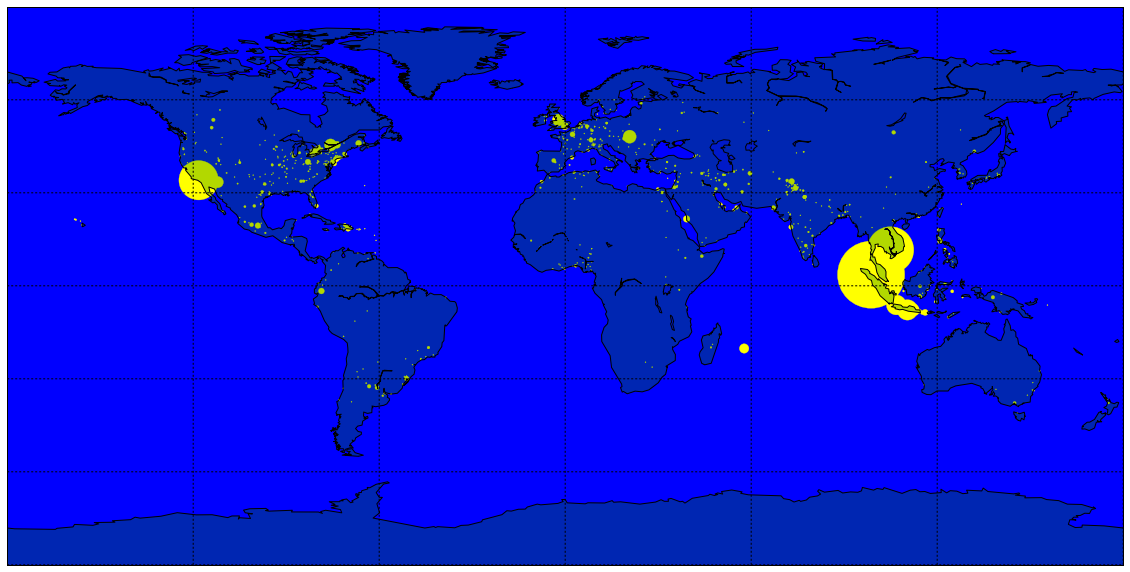

In [11]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='green',lake_color='blue', alpha=0.3)
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='blue')

plt.scatter(location_counts['lng'], 
            location_counts['lat'], 
            s=location_counts['count'],
            c='yellow')

# Users friends

In [6]:
user_friends = pd.read_csv('data/user_friends.csv')
user_friends.set_index('user', inplace=True)

user_friends.friends = user_friends.friends.apply(lambda x: [int(x) for x in x.split()] 
                                                             if x is not np.nan else [])
user_friends['counts'] = [len(x) for x in user_friends['friends']]

user_friends.head()

,friends,counts
user,,
3197468391,"[1346449342, 3873244116, 4226080662, 122290762...",3623
3537982273,"[1491560444, 395798035, 2036380346, 899375619,...",1467
823183725,"[1484954627, 1950387873, 1652977611, 418596082...",96
1872223848,"[83361640, 723814682, 557944478, 1724049724, 2...",13
3429017717,"[4253303705, 2130310957, 1838389374, 392873576...",1136


(array([  1.45890999e-03,   9.08852518e-04,   7.09996536e-04,
          5.49582880e-04,   4.28560743e-04,   3.50885097e-04,
          2.84916168e-04,   2.37140109e-04,   1.87623862e-04,
          1.40006001e-04,   1.15643375e-04,   9.44447264e-05,
          8.19470155e-05,   6.53361340e-05,   5.47368096e-05,
          4.46120818e-05,   3.74931326e-05,   3.27471664e-05,
          2.95831890e-05,   3.05323822e-05,   1.81928702e-05,
          1.80346714e-05,   1.77182736e-05,   1.39215007e-05,
          1.69272793e-05,   1.69272793e-05,   2.18314443e-05,
          3.70185360e-05,   3.44873540e-05,   4.90416502e-06]),
 array([    0.        ,   165.46666667,   330.93333333,   496.4       ,
          661.86666667,   827.33333333,   992.8       ,  1158.26666667,
         1323.73333333,  1489.2       ,  1654.66666667,  1820.13333333,
         1985.6       ,  2151.06666667,  2316.53333333,  2482.        ,
         2647.46666667,  2812.93333333,  2978.4       ,  3143.86666667,
         3309.3333

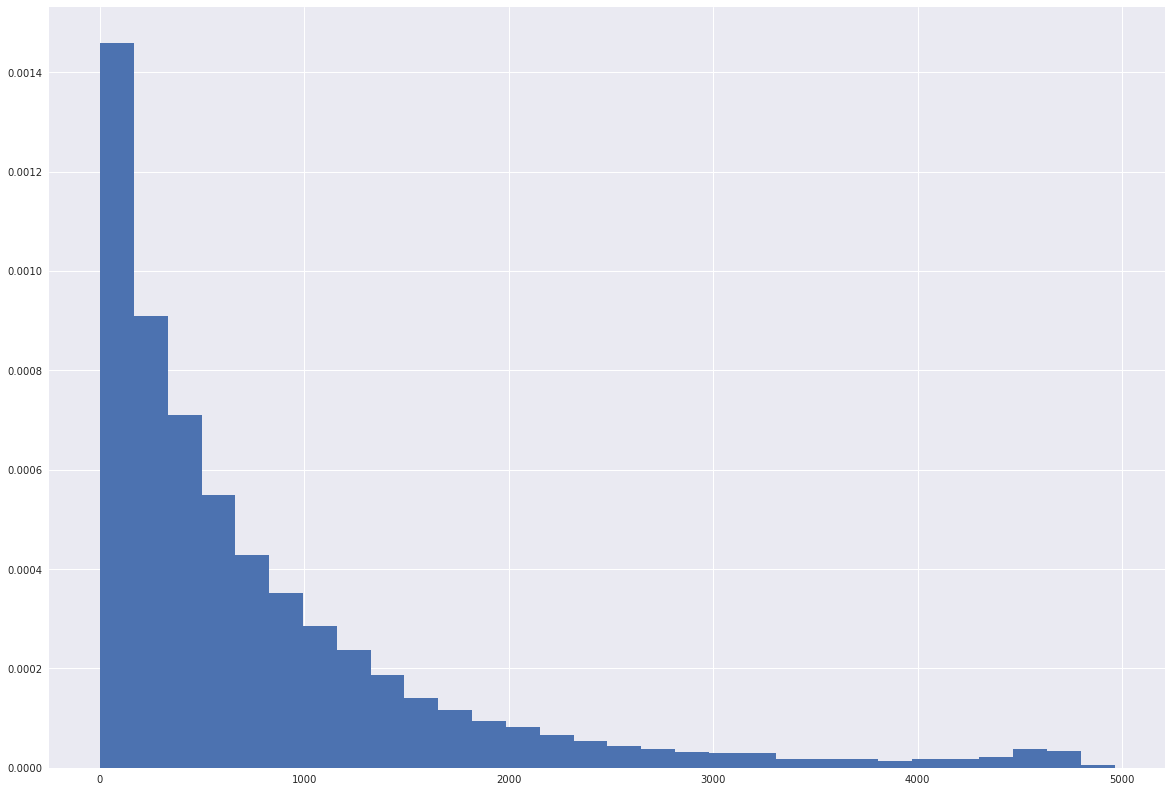

In [7]:
plt.hist(user_friends['counts'], 30, normed=True)

In [8]:
if 1 == 0:
    plt.figure(figsize=(20, 14))

    G = nx.Graph()

    G.add_nodes_from(list(users.index.values))

    i = 0
    for user_id, row in user_friends.iterrows():
        friend_ids = [int(s_id) for s_id in row['friends'].split()]
        G.add_edges_from([(user_id, friend_id) for friend_id in friend_ids], color='blue')
        i += 1
        if i == 100:
            break

    nx.draw(G)

    plt.savefig('data/graph.png')

# Events

In [9]:
def get_start_time(x):
    if type(x) is str and x.find('T') != -1:
        return x.split('T')[0]
    else:
        return np.nan

events = pd.read_csv('data/events.csv')
events.set_index('event_id', inplace=True)

events.start_time = events.start_time.apply(get_start_time)

events.head()

,user_id,start_time,city,state,zip,country,lat,lng,c_1,c_2,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
event_id,,,,,,,,,,,,,,,,,,,,,
684921758,3647864012,2012-10-31,NaN,NaN,NaN,NaN,NaN,NaN,2,0,...,0,1,0,0,0,0,0,0,0,9
244999119,3476440521,2012-11-03,NaN,NaN,NaN,NaN,NaN,NaN,2,0,...,0,0,0,0,0,0,0,0,0,7
3928440935,517514445,2012-11-05,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,12
2582345152,781585781,2012-10-30,NaN,NaN,NaN,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,0,0,8
1051165850,1016098580,2012-09-27,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,9


In [10]:
events.shape[0]

3137972

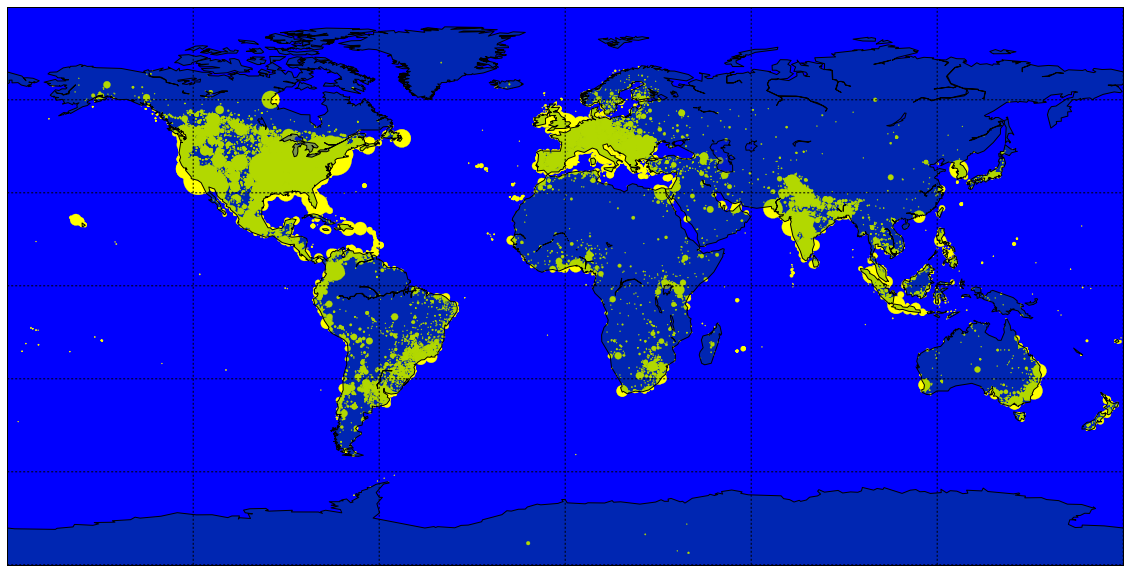

In [23]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='green',lake_color='blue', alpha=0.3)
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='blue')

points = events[['lat', 'lng']]
points['count'] = 1

point_counts = points.groupby(['lat', 'lng']).count().reset_index()
plt.scatter(point_counts['lng'], 
            point_counts['lat'], 
            s=point_counts['count'],
            c='yellow')

# Event attendees

In [12]:
event_attendees = pd.read_csv('data/event_attendees.csv', index_col='event')

event_attendees

event_attendees.head()-

,yes,maybe,invited,no
event,,,,
1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663
686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN
1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854
2621578336,NaN,NaN,NaN,NaN
855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232


# Train

In [13]:
train = pd.read_csv('data/train.csv')
train.head()

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [14]:
print('Размер обучающей выборки: ', train.shape[0])

Размер обучающей выборки:  15398


### Как распределено число событий, которым пользователь поставил отметку?
### Есть ли особо активные пользователи?

In [15]:
event_count_per_user = (train[['user', 'event']]
                        .groupby('user')
                        .count())

print('Самые активные пользователи')
print(event_count_per_user.sort('event', ascending=False)[:10])
print('\n\nСамые неактивные пользователи:')
print(event_count_per_user.sort('event', ascending=True)[:10])

Самые активные пользователи
            event
user             
2903662804     91
3514195773     55
1067164735     49
3943175229     49
3180412264     48
3835637004     46
4075466480     45
3406326706     41
2895220130     37
3834655845     35


Самые неактивные пользователи:
            event
user             
3554343061      4
645414373       4
61814256        4
2086869786      4
630652349       4
236194065       4
2501052021      4
4181452333      4
4180930546      4
1127657981      4


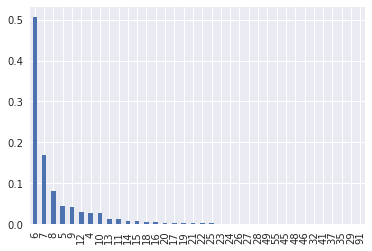

In [16]:
event_dist = event_count_per_user['event'].value_counts(normalize=True)
event_dist.plot(kind='bar')

### Как распределено число пользователей, поставивших отметку событию?
### Есть ли особо популярные события?

In [17]:
user_count_per_event = (train[['user', 'event']]
                        .groupby('event')
                        .count())

print('Популярные события:')
print(user_count_per_event.sort('user', ascending=False)[:10])
print('\n\nНепопулярные события:')
print(user_count_per_event.sort('user', ascending=True)[:10])

Популярные события:
            user
event           
955398943    242
2007279414   196
2529072432   187
1269035551   147
1600413013   114
1390707377    99
1076364848    98
1532377761    96
2149464820    89
268233790     80


Непопулярные события:
            user
event           
104070         1
2708587571     1
2708243586     1
2707138548     1
2706889282     1
2705882453     1
2705765590     1
2705316616     1
2704376528     1
2704261655     1


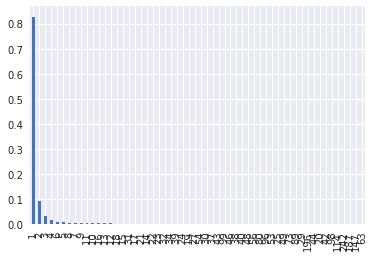

In [18]:
user_dist = user_count_per_event['user'].value_counts(normalize=True)
user_dist.plot(kind='bar')

### Сколько в выборке событий с отметкой interested? с отметкой not interested? без отметок?

In [20]:
counts = pd.DataFrame({'y': train['interested'] - train['not_interested'], 'count': 1}, train.index)
counts.groupby('y').count()

,count
y,
-1,514
0,10753
1,4131


# train_test_split

In [23]:
y = counts['y']

x_train, x_valid, y_train, y_valid = train_test_split(train[['user', 'event', 'invited', 'timestamp']], 
                                                      y, 
                                                      test_size=0.3)
print(x_train.shape[0], x_valid.shape[0])

10778 4620


# User-based

# Test

In [48]:
test = pd.read_csv('data/test.csv')
test.head()

,user,event,invited,timestamp
0,1776192,2877501688,0,2012-11-30 11:39:01.230000+00:00
1,1776192,3025444328,0,2012-11-30 11:39:01.230000+00:00
2,1776192,4078218285,0,2012-11-30 11:39:01.230000+00:00
3,1776192,1024025121,0,2012-11-30 11:39:01.230000+00:00
4,1776192,2972428928,0,2012-11-30 11:39:21.985000+00:00


In [49]:
print('Размер тестовой выборки: ', test.shape[0])

Размер тестовой выборки:  10237
